# Replication: CS-Flow Naive G-Link

In this notebook, we naively apply CS-Flow to our raw G-Link dataset.

In [1]:
from __init__ import activate_cs_flow_config, CSFLOW_DIR
import shutil

# First, we activate the correct configuration.
activate_cs_flow_config(name='one-angle-g-link')

# Extracting Features

In [2]:
import os
import numpy as np
from src.repos.cs_flow.utils import load_datasets, make_dataloaders
from src.repos.cs_flow.extract_features import extract
import src.repos.cs_flow.config as c


prepend_dir = str(CSFLOW_DIR.resolve()) + '/'
export_name = c.class_name
export_dir = prepend_dir + 'data/features/' + export_name + '/'
image_paths = export_dir + c.class_name + '_image_paths.npy'
c.pre_extracted = False
os.makedirs(export_dir, exist_ok=True)
train_set, test_set = load_datasets(prepend_dir + c.dataset_path, c.class_name)
train_loader, test_loader = make_dataloaders(train_set, test_set)

In [3]:
from pathlib import Path

if not Path(image_paths).exists():
    extract(train_loader, test_loader, export_dir, c.class_name)
    paths = [p for p, l in test_set.samples]
    np.save(export_dir + c.class_name + '_image_paths.npy', paths)

Loaded pretrained weights for efficientnet-b5


  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:01<00:30,  1.39s/it]

  9%|▊         | 2/23 [00:01<00:17,  1.18it/s]

 13%|█▎        | 3/23 [00:02<00:12,  1.55it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.81it/s]

 22%|██▏       | 5/23 [00:03<00:08,  2.02it/s]

 26%|██▌       | 6/23 [00:03<00:07,  2.16it/s]

 30%|███       | 7/23 [00:03<00:07,  2.22it/s]

 35%|███▍      | 8/23 [00:04<00:06,  2.28it/s]

 39%|███▉      | 9/23 [00:04<00:05,  2.34it/s]

 43%|████▎     | 10/23 [00:05<00:05,  2.42it/s]

 48%|████▊     | 11/23 [00:05<00:04,  2.43it/s]

 52%|█████▏    | 12/23 [00:05<00:04,  2.47it/s]

 57%|█████▋    | 13/23 [00:06<00:04,  2.50it/s]

 61%|██████    | 14/23 [00:06<00:03,  2.49it/s]

 65%|██████▌   | 15/23 [00:07<00:03,  2.47it/s]

 70%|██████▉   | 16/23 [00:07<00:02,  2.50it/s]

 74%|███████▍  | 17/23 [00:07<00:02,  2.49it/s]

 78%|███████▊  | 18/23 [00:08<00:02,  2.44it/s]

 83%|████████▎ | 19/23 [00:08<00:01,  2.43it/s]

 87%|████████▋ | 20/23 [00:09<00:01,  2.48it/s]

 91%|█████████▏| 21/23 [00:09<00:00,  2.39it/s]

 96%|█████████▌| 22/23 [00:10<00:00,  2.36it/s]

100%|██████████| 23/23 [00:10<00:00,  2.60it/s]

100%|██████████| 23/23 [00:10<00:00,  2.23it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:00<00:02,  2.56it/s]

 29%|██▊       | 2/7 [00:00<00:01,  2.61it/s]

 43%|████▎     | 3/7 [00:01<00:01,  2.56it/s]

 57%|█████▋    | 4/7 [00:01<00:01,  2.46it/s]

 71%|███████▏  | 5/7 [00:01<00:00,  2.50it/s]

 86%|████████▌ | 6/7 [00:02<00:00,  2.38it/s]

100%|██████████| 7/7 [00:02<00:00,  2.47it/s]

100%|██████████| 7/7 [00:02<00:00,  2.48it/s]

# Training

In [4]:
from src.repos.cs_flow.train import train

results = train(train_loader, test_loader)
if isinstance(results, tuple):
    model = results[0]
    print(results[1:])
else:
    model = results

Loaded pretrained weights for efficientnet-b5

Train epoch 0


  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:18,  1.19it/s]

  9%|▊         | 2/23 [00:01<00:14,  1.47it/s]

 13%|█▎        | 3/23 [00:02<00:15,  1.31it/s]

 17%|█▋        | 4/23 [00:02<00:12,  1.46it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.57it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.65it/s]

 30%|███       | 7/23 [00:04<00:09,  1.69it/s]

 35%|███▍      | 8/23 [00:05<00:08,  1.70it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.74it/s]

 43%|████▎     | 10/23 [00:06<00:07,  1.76it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.78it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.74it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.73it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.75it/s]

 65%|██████▌   | 15/23 [00:09<00:04,  1.77it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.77it/s]

 74%|███████▍  | 17/23 [00:10<00:03,  1.79it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.79it/s]

 83%|████████▎ | 19/23 [00:11<00:02,  1.80it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:12<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:13<00:00,  1.52it/s]

100%|██████████| 23/23 [00:13<00:00,  1.67it/s]

Epoch: 0.0 	 train loss: 15.6469


  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.68it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.74it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.77it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.79it/s]

 22%|██▏       | 5/23 [00:02<00:09,  1.81it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.82it/s]

 30%|███       | 7/23 [00:03<00:08,  1.83it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.83it/s]

 39%|███▉      | 9/23 [00:04<00:07,  1.84it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.84it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.86it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.86it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.86it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.86it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.86it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:10<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.86it/s]

 96%|█████████▌| 22/23 [00:11<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.04it/s]

100%|██████████| 23/23 [00:12<00:00,  1.86it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.77it/s]

  9%|▊         | 2/23 [00:01<00:11,  1.79it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.79it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.78it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.78it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.79it/s]

 30%|███       | 7/23 [00:03<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.75it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.75it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.75it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.77it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.75it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.75it/s]

 61%|██████    | 14/23 [00:07<00:05,  1.76it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.78it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.79it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.01it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.59it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.68it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.68it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.67it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.72it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.71it/s]

 30%|███       | 7/23 [00:04<00:09,  1.73it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.75it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.77it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.80it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.97it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.58it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.69it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.75it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.76it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.78it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.79it/s]

 30%|███       | 7/23 [00:04<00:09,  1.75it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.72it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.71it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.74it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.77it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.77it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.77it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.75it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.77it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.77it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.77it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.78it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.79it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.80it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.80it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.97it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

Epoch: 0.4 	 train loss: 2.9171


  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.72it/s]

  9%|▊         | 2/23 [00:01<00:11,  1.76it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.72it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.76it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.79it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.80it/s]

 30%|███       | 7/23 [00:03<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.75it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.69it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.72it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.75it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.79it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.86it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.04it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.67it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.75it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.76it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.68it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.58it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.64it/s]

 30%|███       | 7/23 [00:04<00:09,  1.65it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.68it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.70it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.72it/s]

 48%|████▊     | 11/23 [00:06<00:07,  1.70it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.66it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.67it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.70it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.69it/s]

 70%|██████▉   | 16/23 [00:09<00:04,  1.73it/s]

 74%|███████▍  | 17/23 [00:10<00:03,  1.77it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.80it/s]

 83%|████████▎ | 19/23 [00:11<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:12<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:13<00:00,  2.04it/s]

100%|██████████| 23/23 [00:13<00:00,  1.76it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.58it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.56it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.66it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.67it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.63it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.62it/s]

 30%|███       | 7/23 [00:04<00:09,  1.65it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.69it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.66it/s]

 43%|████▎     | 10/23 [00:06<00:07,  1.64it/s]

 48%|████▊     | 11/23 [00:06<00:07,  1.64it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.68it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.71it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.74it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.76it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.79it/s]

 74%|███████▍  | 17/23 [00:10<00:03,  1.79it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.79it/s]

 83%|████████▎ | 19/23 [00:11<00:02,  1.80it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.80it/s]

 91%|█████████▏| 21/23 [00:12<00:01,  1.80it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:13<00:00,  1.95it/s]

100%|██████████| 23/23 [00:13<00:00,  1.74it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.49it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.55it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.61it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.69it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.72it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.75it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.83it/s]

 61%|██████    | 14/23 [00:07<00:05,  1.78it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.80it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

Epoch: 0.8 	 train loss: 1.8361


  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.53it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.54it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.55it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.64it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.70it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.74it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.83it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.84it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.01it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.58it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.60it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.59it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.59it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.57it/s]

 26%|██▌       | 6/23 [00:03<00:11,  1.53it/s]

 30%|███       | 7/23 [00:04<00:10,  1.54it/s]

 35%|███▍      | 8/23 [00:05<00:09,  1.57it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.56it/s]

 43%|████▎     | 10/23 [00:06<00:08,  1.57it/s]

 48%|████▊     | 11/23 [00:06<00:07,  1.63it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.69it/s]

 57%|█████▋    | 13/23 [00:08<00:05,  1.71it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.74it/s]

 65%|██████▌   | 15/23 [00:09<00:04,  1.77it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.78it/s]

 74%|███████▍  | 17/23 [00:10<00:03,  1.79it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.79it/s]

 83%|████████▎ | 19/23 [00:11<00:02,  1.80it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.80it/s]

 91%|█████████▏| 21/23 [00:12<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:13<00:00,  1.81it/s]

100%|██████████| 23/23 [00:13<00:00,  1.98it/s]

100%|██████████| 23/23 [00:13<00:00,  1.71it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.74it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.69it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.63it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.70it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.69it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.71it/s]

 30%|███       | 7/23 [00:04<00:09,  1.73it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.73it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.75it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.75it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.77it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.78it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.80it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.79it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.79it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.79it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.01it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.51it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.65it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.68it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.66it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.71it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.74it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.82it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.83it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.80it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

Epoch: 0.12 	 train loss: 1.6669


  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.51it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.57it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.66it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.72it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.75it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.78it/s]

 30%|███       | 7/23 [00:04<00:08,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.73it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.72it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.75it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.78it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.86it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.04it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.65it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.65it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.60it/s]

 17%|█▋        | 4/23 [00:02<00:12,  1.56it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.63it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.68it/s]

 30%|███       | 7/23 [00:04<00:09,  1.71it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.74it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.77it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.78it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.78it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.62it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.64it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.71it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.74it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.74it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.79it/s]

 30%|███       | 7/23 [00:03<00:08,  1.82it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.83it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.84it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.83it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.01it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.71it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.55it/s]

 13%|█▎        | 3/23 [00:01<00:13,  1.53it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.59it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.57it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.56it/s]

 30%|███       | 7/23 [00:04<00:10,  1.58it/s]

 35%|███▍      | 8/23 [00:05<00:09,  1.64it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.63it/s]

 43%|████▎     | 10/23 [00:06<00:07,  1.67it/s]

 48%|████▊     | 11/23 [00:06<00:07,  1.61it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.65it/s]

 57%|█████▋    | 13/23 [00:08<00:05,  1.69it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.72it/s]

 65%|██████▌   | 15/23 [00:09<00:04,  1.75it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.77it/s]

 74%|███████▍  | 17/23 [00:10<00:03,  1.78it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.79it/s]

 83%|████████▎ | 19/23 [00:11<00:02,  1.80it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.80it/s]

 91%|█████████▏| 21/23 [00:12<00:01,  1.80it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:13<00:00,  1.98it/s]

100%|██████████| 23/23 [00:13<00:00,  1.72it/s]

Epoch: 0.16 	 train loss: 1.5371


  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.64it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.72it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.76it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.79it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.80it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.80it/s]

 30%|███       | 7/23 [00:03<00:08,  1.83it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.84it/s]

 39%|███▉      | 9/23 [00:04<00:07,  1.84it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.85it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.83it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.83it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:10<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.85it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:15,  1.39it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.55it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.62it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.68it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.72it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.72it/s]

 30%|███       | 7/23 [00:04<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.75it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.74it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.73it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.69it/s]

 70%|██████▉   | 16/23 [00:09<00:04,  1.73it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.75it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.77it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.79it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.77it/s]

 91%|█████████▏| 21/23 [00:12<00:01,  1.79it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.77it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.62it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.62it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.70it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.75it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.78it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.78it/s]

 30%|███       | 7/23 [00:03<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.82it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.51it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.57it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.64it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.72it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.77it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.80it/s]

 30%|███       | 7/23 [00:04<00:08,  1.82it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.83it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.84it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.85it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.85it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.85it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.86it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

Epoch: 0.20 	 train loss: 1.4515


  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.64it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.60it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.61it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.68it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.74it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.79it/s]

 30%|███       | 7/23 [00:04<00:08,  1.81it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.83it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.85it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.86it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.85it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.85it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.86it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.86it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.86it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.86it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.86it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.86it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.55it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.64it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.64it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.66it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.65it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.63it/s]

 30%|███       | 7/23 [00:04<00:09,  1.63it/s]

 35%|███▍      | 8/23 [00:04<00:09,  1.66it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.71it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.73it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.75it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.76it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.78it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.79it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.80it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.80it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:12<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.80it/s]

100%|██████████| 23/23 [00:13<00:00,  1.96it/s]

100%|██████████| 23/23 [00:13<00:00,  1.77it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.58it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.54it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.65it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.72it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.76it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.78it/s]

 30%|███       | 7/23 [00:04<00:08,  1.80it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.85it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.86it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.04it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.63it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.61it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.68it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.73it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.76it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:04<00:09,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.80it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.80it/s]

100%|██████████| 23/23 [00:12<00:00,  1.97it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

Epoch: 0.24 	 train loss: 1.3690


  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:15,  1.43it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.58it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.65it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.63it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.56it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.65it/s]

 30%|███       | 7/23 [00:04<00:09,  1.71it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.75it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.78it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.82it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.86it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.86it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.86it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.51it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.61it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.57it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.60it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.62it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.61it/s]

 30%|███       | 7/23 [00:04<00:09,  1.65it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.69it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.72it/s]

 43%|████▎     | 10/23 [00:06<00:07,  1.74it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.77it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.78it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.73it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.72it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.77it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.79it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:12<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.77it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.56it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.54it/s]

 13%|█▎        | 3/23 [00:01<00:13,  1.54it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.64it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.70it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.73it/s]

 30%|███       | 7/23 [00:04<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.62it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.66it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.64it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.71it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.76it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.80it/s]

 30%|███       | 7/23 [00:03<00:08,  1.82it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.83it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.84it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.85it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.85it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.86it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.86it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.87it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.87it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.86it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.86it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.87it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.87it/s]

 87%|████████▋ | 20/23 [00:10<00:01,  1.87it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.87it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.05it/s]

100%|██████████| 23/23 [00:12<00:00,  1.86it/s]

Epoch: 0.28 	 train loss: 1.2771


  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.49it/s]

  9%|▊         | 2/23 [00:01<00:14,  1.48it/s]

 13%|█▎        | 3/23 [00:02<00:13,  1.49it/s]

 17%|█▋        | 4/23 [00:02<00:12,  1.56it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.62it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.65it/s]

 30%|███       | 7/23 [00:04<00:09,  1.63it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.68it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.72it/s]

 43%|████▎     | 10/23 [00:06<00:07,  1.75it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.78it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.79it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:12<00:01,  1.71it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.65it/s]

100%|██████████| 23/23 [00:13<00:00,  1.86it/s]

100%|██████████| 23/23 [00:13<00:00,  1.74it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.80it/s]

  9%|▊         | 2/23 [00:01<00:11,  1.75it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.79it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.82it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.77it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.78it/s]

 30%|███       | 7/23 [00:03<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.80it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.80it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.67it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.54it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.58it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.65it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.65it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.70it/s]

 30%|███       | 7/23 [00:04<00:09,  1.74it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.77it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.01it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.54it/s]

  9%|▊         | 2/23 [00:01<00:14,  1.47it/s]

 13%|█▎        | 3/23 [00:02<00:13,  1.47it/s]

 17%|█▋        | 4/23 [00:02<00:12,  1.49it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.56it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.64it/s]

 30%|███       | 7/23 [00:04<00:09,  1.70it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.74it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.77it/s]

 43%|████▎     | 10/23 [00:06<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.78it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.73it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.76it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.78it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.78it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.79it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.79it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.80it/s]

 83%|████████▎ | 19/23 [00:11<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:12<00:01,  1.80it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:13<00:00,  1.98it/s]

100%|██████████| 23/23 [00:13<00:00,  1.76it/s]

Epoch: 0.32 	 train loss: 1.1391


  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.62it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.62it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.68it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.73it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.74it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.76it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.73it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.77it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.86it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.87it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.88it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.88it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.87it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.87it/s]

100%|██████████| 23/23 [00:12<00:00,  2.05it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.52it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.56it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.66it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.72it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.74it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.76it/s]

 30%|███       | 7/23 [00:04<00:09,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.48it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.58it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.58it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.61it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.67it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.72it/s]

 30%|███       | 7/23 [00:04<00:09,  1.72it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.74it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.77it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.86it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.86it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.86it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.50it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.64it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.71it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.74it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.77it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.79it/s]

 30%|███       | 7/23 [00:03<00:08,  1.80it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

Epoch: 0.36 	 train loss: 1.0314


  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.60it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.63it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.65it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.71it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.76it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.79it/s]

 30%|███       | 7/23 [00:03<00:08,  1.81it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:07<00:05,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.80it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.80it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.53it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.52it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.59it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.67it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.72it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.74it/s]

 30%|███       | 7/23 [00:04<00:09,  1.75it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.82it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.55it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.62it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.65it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.67it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.70it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.74it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.48it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.52it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.59it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.63it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.69it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.72it/s]

 30%|███       | 7/23 [00:04<00:09,  1.75it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.76it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.77it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.01it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

Epoch: 0.40 	 train loss: 0.9626


  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.58it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.58it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.68it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.72it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.76it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:04<00:09,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.63it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.57it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.64it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.69it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.73it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.76it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.79it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.80it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.80it/s]

100%|██████████| 23/23 [00:12<00:00,  1.96it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.50it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.59it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.66it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.71it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.74it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:04<00:08,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.60it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.66it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.72it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.72it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.76it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.78it/s]

 30%|███       | 7/23 [00:04<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.81it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.84it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

Epoch: 0.44 	 train loss: 0.8735


  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.55it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.51it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.54it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.63it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.71it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.76it/s]

 30%|███       | 7/23 [00:04<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.85it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.86it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.86it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.01it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:15,  1.46it/s]

  9%|▊         | 2/23 [00:01<00:14,  1.45it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.58it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.66it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.68it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.74it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.59it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.57it/s]

 13%|█▎        | 3/23 [00:01<00:13,  1.53it/s]

 17%|█▋        | 4/23 [00:02<00:12,  1.54it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.54it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.59it/s]

 30%|███       | 7/23 [00:04<00:09,  1.61it/s]

 35%|███▍      | 8/23 [00:05<00:09,  1.61it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.60it/s]

 43%|████▎     | 10/23 [00:06<00:07,  1.65it/s]

 48%|████▊     | 11/23 [00:06<00:07,  1.62it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.64it/s]

 57%|█████▋    | 13/23 [00:08<00:05,  1.69it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.73it/s]

 65%|██████▌   | 15/23 [00:09<00:04,  1.75it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.77it/s]

 74%|███████▍  | 17/23 [00:10<00:03,  1.79it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.79it/s]

 83%|████████▎ | 19/23 [00:11<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:12<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:13<00:00,  2.01it/s]

100%|██████████| 23/23 [00:13<00:00,  1.72it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:15,  1.44it/s]

  9%|▊         | 2/23 [00:01<00:14,  1.49it/s]

 13%|█▎        | 3/23 [00:01<00:13,  1.52it/s]

 17%|█▋        | 4/23 [00:02<00:12,  1.55it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.60it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.66it/s]

 30%|███       | 7/23 [00:04<00:09,  1.71it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.73it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.75it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.77it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.78it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.80it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.80it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:12<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:13<00:00,  1.97it/s]

100%|██████████| 23/23 [00:13<00:00,  1.77it/s]

Epoch: 0.48 	 train loss: 0.8015


  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.61it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.67it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.68it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.69it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.73it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.75it/s]

 30%|███       | 7/23 [00:04<00:08,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.81it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.82it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.86it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.87it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.86it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.86it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.87it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.87it/s]

100%|██████████| 23/23 [00:12<00:00,  2.05it/s]

100%|██████████| 23/23 [00:12<00:00,  1.85it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.54it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.53it/s]

 13%|█▎        | 3/23 [00:01<00:13,  1.51it/s]

 17%|█▋        | 4/23 [00:02<00:12,  1.56it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.64it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.69it/s]

 30%|███       | 7/23 [00:04<00:09,  1.75it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.86it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.86it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.87it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.87it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.86it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.48it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.64it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.64it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.69it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.73it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.75it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.82it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.83it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.65it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.68it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.73it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.75it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.76it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.78it/s]

 30%|███       | 7/23 [00:03<00:08,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.79it/s]

 61%|██████    | 14/23 [00:07<00:05,  1.79it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

Epoch: 0.52 	 train loss: 0.7908


  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.72it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.73it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.69it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.68it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.72it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.71it/s]

 30%|███       | 7/23 [00:04<00:09,  1.68it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.70it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.65it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.65it/s]

 48%|████▊     | 11/23 [00:06<00:07,  1.70it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.72it/s]

 57%|█████▋    | 13/23 [00:07<00:06,  1.66it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.66it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.63it/s]

 70%|██████▉   | 16/23 [00:09<00:04,  1.67it/s]

 74%|███████▍  | 17/23 [00:10<00:03,  1.71it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.74it/s]

 83%|████████▎ | 19/23 [00:11<00:02,  1.76it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.76it/s]

 91%|█████████▏| 21/23 [00:12<00:01,  1.78it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.79it/s]

100%|██████████| 23/23 [00:13<00:00,  1.97it/s]

100%|██████████| 23/23 [00:13<00:00,  1.74it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.66it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.64it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.69it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.73it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.75it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.73it/s]

 30%|███       | 7/23 [00:04<00:09,  1.72it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.75it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.78it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.01it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.59it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.62it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.64it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.67it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.70it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.74it/s]

 30%|███       | 7/23 [00:04<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.77it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.78it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.78it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.78it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.86it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.86it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.86it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.87it/s]

100%|██████████| 23/23 [00:12<00:00,  2.04it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:15,  1.45it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.51it/s]

 13%|█▎        | 3/23 [00:02<00:13,  1.50it/s]

 17%|█▋        | 4/23 [00:02<00:12,  1.55it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.62it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.69it/s]

 30%|███       | 7/23 [00:04<00:09,  1.73it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.77it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

Epoch: 0.56 	 train loss: 0.7355


  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.50it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.57it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.67it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.71it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.70it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.70it/s]

 30%|███       | 7/23 [00:04<00:09,  1.74it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.76it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.78it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.78it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.78it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.86it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.86it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.87it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.86it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.04it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.56it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.63it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.61it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.68it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.69it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.71it/s]

 30%|███       | 7/23 [00:04<00:09,  1.74it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.74it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.76it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.77it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.77it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.79it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.79it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.80it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.51it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.57it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.67it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.72it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.77it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.80it/s]

 30%|███       | 7/23 [00:04<00:08,  1.82it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.82it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.82it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.82it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.82it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]


Compute loss and scores on test set:


  0%|          | 0/7 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:00<00:03,  1.73it/s]

 29%|██▊       | 2/7 [00:01<00:03,  1.64it/s]

 43%|████▎     | 3/7 [00:01<00:02,  1.67it/s]

 57%|█████▋    | 4/7 [00:02<00:01,  1.69it/s]

 71%|███████▏  | 5/7 [00:02<00:01,  1.72it/s]

 86%|████████▌ | 6/7 [00:03<00:00,  1.75it/s]

100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

Epoch: 0 	 test_loss: 0.8788
AUROC: 	 last: 0.9215 	 max: 0.9215 	 epoch_max: 0 	 epoch_loss: 0

Train epoch 1


  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.55it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.56it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.57it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.60it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.63it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.62it/s]

 30%|███       | 7/23 [00:04<00:09,  1.67it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.70it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.73it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.76it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.78it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.79it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.79it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.67it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.67it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.72it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.76it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.79it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.80it/s]

 30%|███       | 7/23 [00:03<00:08,  1.82it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.83it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.83it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.60it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.60it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.63it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.68it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.72it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.76it/s]

 30%|███       | 7/23 [00:04<00:09,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.79it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.80it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.80it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.64it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.65it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.69it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.68it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.72it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.76it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.85it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.86it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.87it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.87it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.87it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.87it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.87it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.01it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.67it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.68it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.66it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.65it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.66it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.71it/s]

 30%|███       | 7/23 [00:04<00:09,  1.73it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.77it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.82it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.86it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.86it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.86it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.86it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.86it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.58it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.53it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.59it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.63it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.69it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.73it/s]

 30%|███       | 7/23 [00:04<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.76it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.82it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.04it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.62it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.69it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.68it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.69it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.75it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.76it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.80it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.66it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.68it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.67it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.66it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.71it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.74it/s]

 30%|███       | 7/23 [00:04<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.77it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.78it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:07<00:05,  1.79it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.79it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.79it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.79it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.79it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.79it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.77it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.79it/s]

100%|██████████| 23/23 [00:12<00:00,  1.96it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.48it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.53it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.64it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.70it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.73it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.78it/s]

 30%|███       | 7/23 [00:04<00:08,  1.81it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.82it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.83it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.84it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.84it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.86it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.86it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.86it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.86it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.86it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.87it/s]

100%|██████████| 23/23 [00:12<00:00,  2.04it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.65it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.64it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.59it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.62it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.66it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.70it/s]

 30%|███       | 7/23 [00:04<00:09,  1.68it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.71it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.74it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.76it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.77it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.77it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.78it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.79it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.64it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.69it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.72it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.70it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.67it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.69it/s]

 30%|███       | 7/23 [00:04<00:09,  1.74it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.77it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.82it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.83it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.84it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.80it/s]

100%|██████████| 23/23 [00:12<00:00,  1.96it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.65it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.71it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.75it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.66it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.65it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.67it/s]

 30%|███       | 7/23 [00:04<00:09,  1.71it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.74it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.76it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.78it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.49it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.60it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.57it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.59it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.60it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.64it/s]

 30%|███       | 7/23 [00:04<00:09,  1.67it/s]

 35%|███▍      | 8/23 [00:04<00:09,  1.66it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.66it/s]

 43%|████▎     | 10/23 [00:06<00:07,  1.69it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.73it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.77it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.79it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:12<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.77it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.54it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.54it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.55it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.63it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.70it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.72it/s]

 30%|███       | 7/23 [00:04<00:09,  1.74it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.73it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.74it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.76it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.78it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.76it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.78it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.78it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.79it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.66it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.72it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.76it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.77it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.73it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.75it/s]

 30%|███       | 7/23 [00:03<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.74it/s]

  9%|▊         | 2/23 [00:01<00:11,  1.76it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.78it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.76it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.77it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.72it/s]

 30%|███       | 7/23 [00:04<00:09,  1.73it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.76it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.77it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.77it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:07<00:05,  1.79it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.55it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.61it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.61it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.68it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.69it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.73it/s]

 30%|███       | 7/23 [00:04<00:09,  1.74it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.76it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.77it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.78it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.60it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.70it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.75it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.78it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.79it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.80it/s]

 30%|███       | 7/23 [00:03<00:08,  1.81it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.82it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.82it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.86it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.86it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:10<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.01it/s]

100%|██████████| 23/23 [00:12<00:00,  1.85it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.70it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.62it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.67it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.73it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.76it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.78it/s]

 30%|███       | 7/23 [00:03<00:08,  1.80it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.81it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.82it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.82it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.83it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.84it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.58it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.61it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.63it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.65it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.62it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.60it/s]

 30%|███       | 7/23 [00:04<00:09,  1.66it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.71it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.74it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.76it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.78it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.79it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.75it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.77it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:12<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.78it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.56it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.66it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.70it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.66it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.67it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.70it/s]

 30%|███       | 7/23 [00:04<00:09,  1.73it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.74it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.77it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.78it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.79it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.79it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.80it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.79it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.79it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.80it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.54it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.58it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.54it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.65it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.72it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.76it/s]

 30%|███       | 7/23 [00:04<00:08,  1.80it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.81it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.82it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.85it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.85it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.80it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.80it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.80it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.60it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.53it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.58it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.59it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.65it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.69it/s]

 30%|███       | 7/23 [00:04<00:09,  1.72it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.75it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.76it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.77it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.77it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.78it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.79it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.80it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.80it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.80it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.78it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.53it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.57it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.62it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.68it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.71it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.74it/s]

 30%|███       | 7/23 [00:04<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.77it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.78it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.69it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.74it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.76it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.68it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.64it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.65it/s]

 30%|███       | 7/23 [00:04<00:09,  1.71it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.74it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.77it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.01it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.60it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.67it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.71it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.73it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.76it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:03<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:15,  1.46it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.51it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.57it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.61it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.68it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.72it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.83it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.84it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.85it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.85it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.84it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.01it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:15,  1.45it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.54it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.65it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.66it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.66it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.69it/s]

 30%|███       | 7/23 [00:04<00:09,  1.71it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.73it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.75it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.77it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.83it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.86it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.57it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.56it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.58it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.63it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.69it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.73it/s]

 30%|███       | 7/23 [00:04<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.86it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.55it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.64it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.65it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.71it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.75it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:04<00:08,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.64it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.70it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.65it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.70it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.74it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:04<00:08,  1.80it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.81it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.83it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.84it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.85it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.86it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.86it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.86it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.61it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.60it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.70it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.75it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.78it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.80it/s]

 30%|███       | 7/23 [00:03<00:08,  1.82it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.83it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.84it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.84it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.53it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.55it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.57it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.61it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.69it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.73it/s]

 30%|███       | 7/23 [00:04<00:09,  1.75it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.77it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.73it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.60it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.67it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.70it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.69it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.73it/s]

 30%|███       | 7/23 [00:04<00:09,  1.75it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.78it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:07<00:05,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.80it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.75it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.65it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.62it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.69it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.74it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.76it/s]

 30%|███       | 7/23 [00:04<00:09,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.83it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.84it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.86it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.97it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.51it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.60it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.63it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.69it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.69it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.73it/s]

 30%|███       | 7/23 [00:04<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.59it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.61it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.67it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.68it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.68it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.71it/s]

 30%|███       | 7/23 [00:04<00:09,  1.66it/s]

 35%|███▍      | 8/23 [00:04<00:09,  1.63it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.69it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.73it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.75it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.76it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.78it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.78it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.58it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.62it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.66it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.71it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.74it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.75it/s]

 30%|███       | 7/23 [00:04<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.81it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.82it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.84it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.86it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.86it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.04it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:15,  1.42it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.56it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.57it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.60it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.56it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.60it/s]

 30%|███       | 7/23 [00:04<00:09,  1.67it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.73it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.77it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.83it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.78it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.61it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.64it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.63it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.67it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.70it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.74it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.78it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.80it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.80it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.80it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.80it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.80it/s]

100%|██████████| 23/23 [00:12<00:00,  1.96it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.58it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.65it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.72it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.75it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.77it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.78it/s]

 30%|███       | 7/23 [00:03<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.01it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.49it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.54it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.65it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.72it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.75it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:04<00:08,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.80it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:15,  1.45it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.55it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.57it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.60it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.66it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.67it/s]

 30%|███       | 7/23 [00:04<00:09,  1.74it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.76it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.77it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.83it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.83it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.81it/s]

  9%|▊         | 2/23 [00:01<00:11,  1.82it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.82it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.76it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.75it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:03<00:09,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.76it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.71it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.74it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.75it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.76it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.77it/s]

 61%|██████    | 14/23 [00:07<00:05,  1.79it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.79it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.80it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.62it/s]

  9%|▊         | 2/23 [00:01<00:14,  1.47it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.62it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.71it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.76it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.79it/s]

 30%|███       | 7/23 [00:04<00:08,  1.82it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.83it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.84it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.84it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.85it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.86it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.01it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.61it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.60it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.59it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.60it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.63it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.65it/s]

 30%|███       | 7/23 [00:04<00:09,  1.70it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.73it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.75it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.77it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.78it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.56it/s]

  9%|▊         | 2/23 [00:01<00:14,  1.48it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.63it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.71it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.77it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.80it/s]

 30%|███       | 7/23 [00:04<00:08,  1.81it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.83it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.83it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.84it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.85it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.86it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.87it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.87it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.87it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.87it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.87it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.87it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.88it/s]

 87%|████████▋ | 20/23 [00:10<00:01,  1.88it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.88it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.87it/s]

100%|██████████| 23/23 [00:12<00:00,  2.04it/s]

100%|██████████| 23/23 [00:12<00:00,  1.85it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.51it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.57it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.64it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.70it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.74it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.76it/s]

 30%|███       | 7/23 [00:04<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.81it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.48it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.59it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.67it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.66it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.62it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.68it/s]

 30%|███       | 7/23 [00:04<00:09,  1.69it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.72it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.72it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.74it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.76it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.55it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.56it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.60it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.60it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.67it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.70it/s]

 30%|███       | 7/23 [00:04<00:09,  1.72it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.75it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.76it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.78it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.79it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.79it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.79it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.80it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.57it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.71it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.77it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.81it/s]

 22%|██▏       | 5/23 [00:02<00:09,  1.82it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.83it/s]

 30%|███       | 7/23 [00:03<00:08,  1.83it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.84it/s]

 39%|███▉      | 9/23 [00:04<00:07,  1.84it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.64it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.56it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.57it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.65it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.70it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.74it/s]

 30%|███       | 7/23 [00:04<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.78it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.78it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.74it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.73it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.76it/s]

100%|██████████| 23/23 [00:12<00:00,  1.96it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.66it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.73it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.78it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.81it/s]

 22%|██▏       | 5/23 [00:02<00:09,  1.81it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.83it/s]

 30%|███       | 7/23 [00:03<00:08,  1.85it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.85it/s]

 39%|███▉      | 9/23 [00:04<00:07,  1.85it/s]

 43%|████▎     | 10/23 [00:05<00:06,  1.86it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.86it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.83it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.78it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.76it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.76it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.79it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.66it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.57it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.55it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.59it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.66it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.72it/s]

 30%|███       | 7/23 [00:04<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.77it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.78it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.77it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.74it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.78it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.57it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.59it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.64it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.71it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.75it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.78it/s]

 30%|███       | 7/23 [00:04<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.84it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.04it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.51it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.55it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.61it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.63it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.65it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.68it/s]

 30%|███       | 7/23 [00:04<00:09,  1.70it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.73it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.76it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.82it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.83it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.83it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.86it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.51it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.66it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.74it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.78it/s]

 22%|██▏       | 5/23 [00:02<00:09,  1.81it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.82it/s]

 30%|███       | 7/23 [00:03<00:08,  1.84it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.85it/s]

 39%|███▉      | 9/23 [00:04<00:07,  1.85it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.85it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.86it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.86it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:10<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.85it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.65it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.69it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.72it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.76it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.78it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.78it/s]

 30%|███       | 7/23 [00:03<00:08,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.04it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.76it/s]

  9%|▊         | 2/23 [00:01<00:11,  1.76it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.68it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.65it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.68it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.71it/s]

 30%|███       | 7/23 [00:04<00:09,  1.74it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.77it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.78it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.79it/s]

 61%|██████    | 14/23 [00:07<00:05,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.79it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.80it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.57it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.58it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.67it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.71it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.74it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.76it/s]

 30%|███       | 7/23 [00:04<00:09,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.82it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.83it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.84it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.86it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.86it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.87it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.86it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.01it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]


Compute loss and scores on test set:


  0%|          | 0/7 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:00<00:03,  1.69it/s]

 29%|██▊       | 2/7 [00:01<00:02,  1.73it/s]

 43%|████▎     | 3/7 [00:01<00:02,  1.79it/s]

 57%|█████▋    | 4/7 [00:02<00:01,  1.79it/s]

 71%|███████▏  | 5/7 [00:02<00:01,  1.78it/s]

 86%|████████▌ | 6/7 [00:03<00:00,  1.75it/s]

100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

Epoch: 1 	 test_loss: 0.6810
AUROC: 	 last: 0.8868 	 max: 0.9215 	 epoch_max: 0 	 epoch_loss: 0

Train epoch 2


  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.70it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.57it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.64it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.64it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.69it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.75it/s]

 30%|███       | 7/23 [00:04<00:08,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.83it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.84it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.84it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.51it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.57it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.62it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.66it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.72it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.75it/s]

 30%|███       | 7/23 [00:04<00:09,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.82it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.83it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.84it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.67it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.74it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.75it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.75it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.76it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.69it/s]

 30%|███       | 7/23 [00:04<00:09,  1.67it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.72it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.74it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.76it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.77it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.78it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.78it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.86it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.86it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.58it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.53it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.60it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.64it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.64it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.67it/s]

 30%|███       | 7/23 [00:04<00:09,  1.71it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.74it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.77it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.83it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.61it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.52it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.66it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.73it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.78it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.80it/s]

 30%|███       | 7/23 [00:03<00:08,  1.81it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.82it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.83it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.84it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.01it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.75it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.65it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.66it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.71it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.75it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.78it/s]

 30%|███       | 7/23 [00:03<00:08,  1.80it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.81it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.82it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.85it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.85it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.80it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.60it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.64it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.70it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.74it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.77it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.79it/s]

 30%|███       | 7/23 [00:03<00:08,  1.80it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.82it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.83it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.83it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.66it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.74it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.76it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.71it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.69it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.73it/s]

 30%|███       | 7/23 [00:04<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.80it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.80it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.71it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.65it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.71it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.74it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.77it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:03<00:08,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.80it/s]

100%|██████████| 23/23 [00:12<00:00,  1.96it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.69it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.60it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.63it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.66it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.72it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.76it/s]

 30%|███       | 7/23 [00:04<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.81it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.83it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.84it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.86it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.86it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.86it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.86it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.86it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.55it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.55it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.56it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.63it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.65it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.70it/s]

 30%|███       | 7/23 [00:04<00:09,  1.72it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.75it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.77it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.80it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.80it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.67it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.64it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.72it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.77it/s]

 22%|██▏       | 5/23 [00:02<00:09,  1.80it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.82it/s]

 30%|███       | 7/23 [00:03<00:08,  1.82it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.83it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.84it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.84it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.86it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.86it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.86it/s]

 87%|████████▋ | 20/23 [00:10<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.86it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.86it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.52it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.67it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.71it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.75it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.77it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.80it/s]

 30%|███       | 7/23 [00:03<00:08,  1.81it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.81it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.83it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.83it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.83it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.59it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.59it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.65it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.72it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.77it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.79it/s]

 30%|███       | 7/23 [00:04<00:08,  1.81it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.82it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.84it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.84it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.86it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.86it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.87it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.86it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.87it/s]

 87%|████████▋ | 20/23 [00:10<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.49it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.59it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.64it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.68it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.68it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.72it/s]

 30%|███       | 7/23 [00:04<00:09,  1.74it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.76it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.78it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.83it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.56it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.60it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.65it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.70it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.75it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:04<00:09,  1.73it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.73it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.75it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.76it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.78it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.86it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.86it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.58it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.61it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.62it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.63it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.70it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.75it/s]

 30%|███       | 7/23 [00:04<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.83it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.84it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.68it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.70it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.70it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.74it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.75it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:03<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.80it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.67it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.64it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.66it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.71it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.75it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:04<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.82it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.82it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:05,  1.75it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.72it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.77it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.57it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.60it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.69it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.74it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.76it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.69it/s]

 30%|███       | 7/23 [00:04<00:09,  1.68it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.74it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.78it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.82it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.83it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.83it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.86it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.79it/s]

100%|██████████| 23/23 [00:12<00:00,  1.96it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.80it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.73it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.75it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.79it/s]

 22%|██▏       | 5/23 [00:02<00:09,  1.82it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.83it/s]

 30%|███       | 7/23 [00:03<00:08,  1.84it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.83it/s]

 39%|███▉      | 9/23 [00:04<00:07,  1.83it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.84it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.85it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.86it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.86it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.86it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.87it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.87it/s]

 87%|████████▋ | 20/23 [00:10<00:01,  1.87it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.87it/s]

 96%|█████████▌| 22/23 [00:11<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.86it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.56it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.61it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.71it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.77it/s]

 22%|██▏       | 5/23 [00:02<00:09,  1.81it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.83it/s]

 30%|███       | 7/23 [00:03<00:08,  1.84it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.86it/s]

 39%|███▉      | 9/23 [00:04<00:07,  1.86it/s]

 43%|████▎     | 10/23 [00:05<00:06,  1.87it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.88it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.88it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.88it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.88it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.87it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.87it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.87it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.87it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.87it/s]

 87%|████████▋ | 20/23 [00:10<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.86it/s]

 96%|█████████▌| 22/23 [00:11<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.86it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.65it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.58it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.68it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.73it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.76it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.79it/s]

 30%|███       | 7/23 [00:03<00:08,  1.80it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.81it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.77it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.71it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.75it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.75it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.77it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.79it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.86it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.04it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.67it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.63it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.63it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.64it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.67it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.72it/s]

 30%|███       | 7/23 [00:04<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.73it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.73it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.72it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.76it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.73it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.75it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.76it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.78it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.80it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.80it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.80it/s]

 91%|█████████▏| 21/23 [00:12<00:01,  1.80it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.78it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.61it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.62it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.68it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.72it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.77it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.79it/s]

 30%|███       | 7/23 [00:03<00:08,  1.82it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.83it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.85it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.85it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.85it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.85it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:10<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.04it/s]

100%|██████████| 23/23 [00:12<00:00,  1.85it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.48it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.51it/s]

 13%|█▎        | 3/23 [00:02<00:13,  1.49it/s]

 17%|█▋        | 4/23 [00:02<00:12,  1.56it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.64it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.69it/s]

 30%|███       | 7/23 [00:04<00:09,  1.73it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.76it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.77it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.78it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.60it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.62it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.62it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.69it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.74it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:04<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.82it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.83it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.84it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.86it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.86it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.86it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.04it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:15,  1.42it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.64it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.61it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.68it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.73it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.76it/s]

 30%|███       | 7/23 [00:04<00:08,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.78it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.79it/s]

100%|██████████| 23/23 [00:12<00:00,  1.95it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.56it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.64it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.72it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.76it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.79it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.80it/s]

 30%|███       | 7/23 [00:03<00:08,  1.81it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.81it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.82it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.82it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.65it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.72it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.75it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.77it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.77it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:03<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.77it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.78it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.83it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.84it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.86it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.87it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.87it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.86it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.86it/s]

 87%|████████▋ | 20/23 [00:10<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.86it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.87it/s]

100%|██████████| 23/23 [00:12<00:00,  2.04it/s]

100%|██████████| 23/23 [00:12<00:00,  1.85it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.61it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.69it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.68it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.60it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.62it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.67it/s]

 30%|███       | 7/23 [00:04<00:09,  1.70it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.74it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.76it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.77it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.75it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.78it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.80it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.80it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.80it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.80it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.80it/s]

100%|██████████| 23/23 [00:12<00:00,  1.97it/s]

100%|██████████| 23/23 [00:12<00:00,  1.78it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.70it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.67it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.66it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.68it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.74it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:04<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.82it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.82it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.82it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.55it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.57it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.56it/s]

 17%|█▋        | 4/23 [00:02<00:12,  1.58it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.67it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.71it/s]

 30%|███       | 7/23 [00:04<00:09,  1.72it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.74it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.76it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.78it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.79it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.49it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.60it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.67it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.67it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.73it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:04<00:08,  1.80it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.82it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.83it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.82it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.83it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.01it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.47it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.64it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.57it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.64it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.70it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.73it/s]

 30%|███       | 7/23 [00:04<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.79it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.79it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.47it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.58it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.62it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.68it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.72it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.64it/s]

 30%|███       | 7/23 [00:04<00:09,  1.66it/s]

 35%|███▍      | 8/23 [00:04<00:09,  1.66it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.68it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.70it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.75it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.78it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.80it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.80it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:12<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.78it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.51it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.63it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.70it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.72it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.74it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.75it/s]

 30%|███       | 7/23 [00:04<00:09,  1.70it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.72it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.75it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.71it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.75it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.77it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.67it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.70it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.72it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.75it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.71it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.72it/s]

 30%|███       | 7/23 [00:04<00:09,  1.72it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.73it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.75it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.76it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.78it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.80it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.80it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.71it/s]

  9%|▊         | 2/23 [00:01<00:11,  1.75it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.78it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.81it/s]

 22%|██▏       | 5/23 [00:02<00:09,  1.84it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.85it/s]

 30%|███       | 7/23 [00:03<00:08,  1.85it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.86it/s]

 39%|███▉      | 9/23 [00:04<00:07,  1.85it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.85it/s]

 48%|████▊     | 11/23 [00:05<00:06,  1.85it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.85it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:10<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.86it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.61it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.73it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.78it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.80it/s]

 22%|██▏       | 5/23 [00:02<00:09,  1.80it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.81it/s]

 30%|███       | 7/23 [00:03<00:08,  1.82it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.82it/s]

 39%|███▉      | 9/23 [00:04<00:07,  1.82it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.82it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.83it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.83it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.52it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.51it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.60it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.62it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.68it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.72it/s]

 30%|███       | 7/23 [00:04<00:09,  1.75it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.77it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.78it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.67it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.68it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.69it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.74it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.75it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:03<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.69it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.67it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.72it/s]

100%|██████████| 23/23 [00:12<00:00,  1.92it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.67it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.63it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.62it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.66it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.72it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.76it/s]

 30%|███       | 7/23 [00:04<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.82it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.83it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.84it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.86it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.04it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.61it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.60it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.65it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.71it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.74it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:04<00:08,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.82it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.82it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.79it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.74it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.76it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.78it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.79it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.80it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.80it/s]

100%|██████████| 23/23 [00:12<00:00,  1.96it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.51it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.54it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.56it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.62it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.68it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.72it/s]

 30%|███       | 7/23 [00:04<00:09,  1.75it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.77it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.82it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.84it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.80it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.80it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.48it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.53it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.62it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.68it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.71it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.75it/s]

 30%|███       | 7/23 [00:04<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.82it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.83it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.57it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.68it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.73it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.76it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.76it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.78it/s]

 30%|███       | 7/23 [00:03<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.80it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.80it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.50it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.56it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.58it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.68it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.73it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.76it/s]

 30%|███       | 7/23 [00:04<00:08,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.84it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.55it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.63it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.67it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.71it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.74it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:04<00:08,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.81it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.84it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.85it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.85it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.85it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.86it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.64it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.66it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.72it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.75it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.76it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.79it/s]

 30%|███       | 7/23 [00:03<00:08,  1.81it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.82it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.82it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.01it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.51it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.57it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.61it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.65it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.70it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.70it/s]

 30%|███       | 7/23 [00:04<00:09,  1.73it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.75it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.77it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.78it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.59it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.69it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.74it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.77it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.79it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.80it/s]

 30%|███       | 7/23 [00:03<00:08,  1.81it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.82it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.82it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.82it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.62it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.61it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.71it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.75it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.78it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.83it/s]

 30%|███       | 7/23 [00:03<00:08,  1.84it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.84it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.85it/s]

 43%|████▎     | 10/23 [00:05<00:06,  1.86it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.86it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.86it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.86it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.86it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:10<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.85it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.58it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.55it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.59it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.59it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.65it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.70it/s]

 30%|███       | 7/23 [00:04<00:09,  1.73it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.75it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.77it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.78it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.80it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.80it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.80it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.80it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.59it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.61it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.62it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.62it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.64it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.67it/s]

 30%|███       | 7/23 [00:04<00:09,  1.71it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.74it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.77it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.78it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.78it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.73it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.75it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.77it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.78it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.80it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.97it/s]

100%|██████████| 23/23 [00:12<00:00,  1.78it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.54it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.59it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.64it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.71it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.76it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.79it/s]

 30%|███       | 7/23 [00:04<00:08,  1.81it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.83it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.56it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.56it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.67it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.73it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.77it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.79it/s]

 30%|███       | 7/23 [00:04<00:08,  1.81it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.83it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.84it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.84it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.85it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.86it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.80it/s]

100%|██████████| 23/23 [00:12<00:00,  1.97it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.53it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.50it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.62it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.66it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.68it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.73it/s]

 30%|███       | 7/23 [00:04<00:09,  1.75it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.82it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.51it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.56it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.66it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.72it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.74it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.75it/s]

 30%|███       | 7/23 [00:04<00:08,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.57it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.55it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.62it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.68it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.72it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.75it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.83it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.01it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]


Compute loss and scores on test set:


  0%|          | 0/7 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:00<00:03,  1.62it/s]

 29%|██▊       | 2/7 [00:01<00:02,  1.70it/s]

 43%|████▎     | 3/7 [00:01<00:02,  1.76it/s]

 57%|█████▋    | 4/7 [00:02<00:01,  1.78it/s]

 71%|███████▏  | 5/7 [00:02<00:01,  1.73it/s]

 86%|████████▌ | 6/7 [00:03<00:00,  1.74it/s]

100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

Epoch: 2 	 test_loss: 0.6546
AUROC: 	 last: 0.9118 	 max: 0.9215 	 epoch_max: 0 	 epoch_loss: 0

Train epoch 3


  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:11,  1.84it/s]

  9%|▊         | 2/23 [00:01<00:11,  1.76it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.80it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.80it/s]

 22%|██▏       | 5/23 [00:02<00:09,  1.81it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.80it/s]

 30%|███       | 7/23 [00:03<00:08,  1.81it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.82it/s]

 39%|███▉      | 9/23 [00:04<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.80it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.87it/s]

100%|██████████| 23/23 [00:12<00:00,  2.04it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.76it/s]

  9%|▊         | 2/23 [00:01<00:11,  1.75it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.75it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.71it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.67it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.61it/s]

 30%|███       | 7/23 [00:04<00:09,  1.66it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.68it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.71it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.75it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.77it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.78it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.79it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.58it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.69it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.74it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.76it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.76it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.80it/s]

 30%|███       | 7/23 [00:03<00:08,  1.80it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.79it/s]

 61%|██████    | 14/23 [00:07<00:05,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.80it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.79it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.79it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.79it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.80it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.80it/s]

100%|██████████| 23/23 [00:12<00:00,  1.97it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.64it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.63it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.70it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.68it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.69it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.68it/s]

 30%|███       | 7/23 [00:04<00:09,  1.73it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.76it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.69it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.70it/s]

 48%|████▊     | 11/23 [00:06<00:07,  1.71it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.72it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.74it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.78it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.79it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.80it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.78it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.75it/s]

  9%|▊         | 2/23 [00:01<00:11,  1.75it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.76it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.72it/s]

 22%|██▏       | 5/23 [00:02<00:11,  1.61it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.61it/s]

 30%|███       | 7/23 [00:04<00:09,  1.60it/s]

 35%|███▍      | 8/23 [00:04<00:09,  1.65it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.69it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.73it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.76it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.78it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.79it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.72it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.65it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.72it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.77it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.80it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.74it/s]

 30%|███       | 7/23 [00:03<00:09,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.81it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.83it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.84it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.83it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:15,  1.43it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.58it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.65it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.63it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.68it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.72it/s]

 30%|███       | 7/23 [00:04<00:09,  1.75it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.77it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.82it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.86it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.86it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.86it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.86it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.86it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.04it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.53it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.60it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.57it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.65it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.70it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.74it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.85it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.53it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.55it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.62it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.66it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.68it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.69it/s]

 30%|███       | 7/23 [00:04<00:09,  1.73it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.75it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.76it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.78it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.80it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.79it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.79it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.80it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.80it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.52it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.59it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.71it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.77it/s]

 22%|██▏       | 5/23 [00:02<00:09,  1.80it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.82it/s]

 30%|███       | 7/23 [00:03<00:08,  1.83it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.83it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.84it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.84it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.85it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.85it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.86it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.87it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.86it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:10<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.86it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.85it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:15,  1.43it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.60it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.58it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.58it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.60it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.61it/s]

 30%|███       | 7/23 [00:04<00:09,  1.67it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.71it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.74it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.77it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.78it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.48it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.63it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.70it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.73it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.76it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.78it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:07<00:05,  1.79it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.80it/s]

100%|██████████| 23/23 [00:12<00:00,  1.96it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.63it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.64it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.71it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.71it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.74it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.76it/s]

 30%|███       | 7/23 [00:04<00:08,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.80it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.80it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.80it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.80it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.96it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.62it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.65it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.66it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.67it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.71it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.73it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:15,  1.43it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.52it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.62it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.66it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.70it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.73it/s]

 30%|███       | 7/23 [00:04<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.77it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.82it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.85it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.86it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.87it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.87it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.87it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.87it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.87it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.87it/s]

100%|██████████| 23/23 [00:12<00:00,  2.04it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.47it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.57it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.57it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.60it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.66it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.70it/s]

 30%|███       | 7/23 [00:04<00:09,  1.73it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.76it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.78it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.80it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.51it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.60it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.68it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.73it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.76it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.80it/s]

 30%|███       | 7/23 [00:03<00:08,  1.83it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.84it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.85it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.82it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.58it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.62it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.70it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.74it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.77it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.78it/s]

 30%|███       | 7/23 [00:03<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.80it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.04it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.53it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.62it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.60it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.68it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.73it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.76it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.82it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.84it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:15,  1.45it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.54it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.67it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.74it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.78it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.81it/s]

 30%|███       | 7/23 [00:04<00:08,  1.82it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.82it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.83it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.86it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.86it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.86it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.86it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.86it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  2.01it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.49it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.59it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.68it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.74it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.77it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.81it/s]

 30%|███       | 7/23 [00:03<00:08,  1.82it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.82it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.83it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.84it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.85it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.84it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.80it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:15,  1.41it/s]

  9%|▊         | 2/23 [00:01<00:14,  1.48it/s]

 13%|█▎        | 3/23 [00:01<00:13,  1.53it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.59it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.63it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.70it/s]

 30%|███       | 7/23 [00:04<00:09,  1.75it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.85it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.86it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.86it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.86it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.86it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.87it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.87it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.86it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.86it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.58it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.56it/s]

 13%|█▎        | 3/23 [00:01<00:13,  1.53it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.59it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.66it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.70it/s]

 30%|███       | 7/23 [00:04<00:09,  1.75it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.86it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.86it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.86it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.87it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.86it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.86it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.86it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.05it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.53it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.52it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.60it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.69it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.75it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:04<00:08,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.53it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.62it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.62it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.67it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.72it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.74it/s]

 30%|███       | 7/23 [00:04<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.77it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.78it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:15,  1.43it/s]

  9%|▊         | 2/23 [00:01<00:14,  1.45it/s]

 13%|█▎        | 3/23 [00:02<00:13,  1.50it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.59it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.59it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.62it/s]

 30%|███       | 7/23 [00:04<00:09,  1.67it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.70it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.75it/s]

 43%|████▎     | 10/23 [00:06<00:07,  1.78it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:12<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.01it/s]

100%|██████████| 23/23 [00:12<00:00,  1.78it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.60it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.57it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.55it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.60it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.67it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.70it/s]

 30%|███       | 7/23 [00:04<00:09,  1.75it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.83it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.84it/s]

100%|██████████| 23/23 [00:12<00:00,  2.01it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.54it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.57it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.58it/s]

 17%|█▋        | 4/23 [00:02<00:12,  1.57it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.65it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.70it/s]

 30%|███       | 7/23 [00:04<00:09,  1.74it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.77it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.78it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.79it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.79it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.79it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.79it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.80it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.80it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.80it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.97it/s]

100%|██████████| 23/23 [00:12<00:00,  1.78it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.71it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.69it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.76it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.70it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.73it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.76it/s]

 30%|███       | 7/23 [00:03<00:08,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.57it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.62it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.61it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.69it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.74it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:04<00:08,  1.81it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.82it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.83it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.84it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.85it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.85it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.86it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.86it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.86it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.59it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.62it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.65it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.67it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.72it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.75it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.82it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.80it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.80it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.80it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.80it/s]

100%|██████████| 23/23 [00:12<00:00,  1.97it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.58it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.57it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.63it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.70it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.74it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.75it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.97it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.50it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.53it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.60it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.66it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.71it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.75it/s]

 30%|███       | 7/23 [00:04<00:08,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.83it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.84it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.86it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.86it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.86it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.86it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.86it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:15,  1.44it/s]

  9%|▊         | 2/23 [00:01<00:14,  1.47it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.58it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.66it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.71it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.75it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.78it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.80it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.80it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.80it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.80it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.47it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.56it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.58it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.65it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.72it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:04<00:08,  1.81it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.82it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.82it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.84it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.84it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.54it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.56it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.61it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.62it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.68it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.73it/s]

 30%|███       | 7/23 [00:04<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.69it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.75it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.77it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.80it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.66it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.65it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.71it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.74it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.77it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.79it/s]

 30%|███       | 7/23 [00:03<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.82it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.82it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.51it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.53it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.63it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.69it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.73it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.75it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.83it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.83it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.51it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.59it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.67it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.73it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.77it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.80it/s]

 30%|███       | 7/23 [00:03<00:08,  1.82it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.83it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.83it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.84it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.83it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.83it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.83it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.84it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.86it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.86it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.86it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.86it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.86it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.61it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.50it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.55it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.59it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.58it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.62it/s]

 30%|███       | 7/23 [00:04<00:09,  1.62it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.67it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.70it/s]

 43%|████▎     | 10/23 [00:06<00:07,  1.73it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.75it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.76it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.79it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.84it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.85it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:12<00:01,  1.84it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.78it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.57it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.54it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.60it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.66it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.64it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.67it/s]

 30%|███       | 7/23 [00:04<00:09,  1.68it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.71it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.73it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.75it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.77it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.78it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.79it/s]

 61%|██████    | 14/23 [00:08<00:05,  1.79it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.79it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.80it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:11<00:02,  1.71it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.70it/s]

 91%|█████████▏| 21/23 [00:12<00:01,  1.68it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.69it/s]

100%|██████████| 23/23 [00:13<00:00,  1.88it/s]

100%|██████████| 23/23 [00:13<00:00,  1.74it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.74it/s]

  9%|▊         | 2/23 [00:01<00:11,  1.80it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.82it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.82it/s]

 22%|██▏       | 5/23 [00:02<00:09,  1.83it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.84it/s]

 30%|███       | 7/23 [00:03<00:08,  1.85it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.86it/s]

 39%|███▉      | 9/23 [00:04<00:07,  1.86it/s]

 43%|████▎     | 10/23 [00:05<00:06,  1.86it/s]

 48%|████▊     | 11/23 [00:05<00:06,  1.85it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.85it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.86it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.85it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:10<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:11<00:00,  1.80it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.86it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.68it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.64it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.61it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.68it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.72it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.76it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.79it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.80it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.80it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.80it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.80it/s]

100%|██████████| 23/23 [00:12<00:00,  1.97it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.67it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.53it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.54it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.60it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.67it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.71it/s]

 30%|███       | 7/23 [00:04<00:09,  1.74it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.76it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.77it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.78it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.79it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.80it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:12,  1.72it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.68it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.71it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.74it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.75it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:03<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.79it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.55it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.59it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.67it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.71it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.74it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:04<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.53it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.52it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.59it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.61it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.66it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.69it/s]

 30%|███       | 7/23 [00:04<00:09,  1.72it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.75it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.76it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.77it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.77it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.78it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.84it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.52it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.55it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.62it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.69it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.73it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.76it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.85it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.86it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.86it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.86it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.87it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.84it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.62it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.74it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.79it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.81it/s]

 22%|██▏       | 5/23 [00:02<00:09,  1.82it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.83it/s]

 30%|███       | 7/23 [00:03<00:08,  1.84it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.84it/s]

 39%|███▉      | 9/23 [00:04<00:07,  1.85it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.70it/s]

 48%|████▊     | 11/23 [00:06<00:07,  1.70it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.75it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.79it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.85it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.85it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.84it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.57it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.57it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.58it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.66it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.71it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.74it/s]

 30%|███       | 7/23 [00:04<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.81it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.81it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.68it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.61it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.59it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.66it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.70it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.73it/s]

 30%|███       | 7/23 [00:04<00:09,  1.75it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.80it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.80it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.64it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.67it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.71it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.74it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.76it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.78it/s]

 30%|███       | 7/23 [00:03<00:08,  1.79it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.79it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.82it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.60it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.65it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.67it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.72it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.75it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.77it/s]

 30%|███       | 7/23 [00:04<00:08,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.81it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.83it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.83it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.02it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.52it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.56it/s]

 13%|█▎        | 3/23 [00:01<00:13,  1.51it/s]

 17%|█▋        | 4/23 [00:02<00:12,  1.56it/s]

 22%|██▏       | 5/23 [00:03<00:11,  1.56it/s]

 26%|██▌       | 6/23 [00:03<00:10,  1.61it/s]

 30%|███       | 7/23 [00:04<00:09,  1.62it/s]

 35%|███▍      | 8/23 [00:05<00:09,  1.64it/s]

 39%|███▉      | 9/23 [00:05<00:08,  1.68it/s]

 43%|████▎     | 10/23 [00:06<00:07,  1.72it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.75it/s]

 52%|█████▏    | 12/23 [00:07<00:06,  1.77it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.80it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:11<00:02,  1.85it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:12<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:13<00:00,  2.02it/s]

100%|██████████| 23/23 [00:13<00:00,  1.77it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.64it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.52it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.54it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.63it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.67it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.74it/s]

 30%|███       | 7/23 [00:04<00:09,  1.78it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.80it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:08<00:04,  1.80it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.80it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.99it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.65it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.56it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.58it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.66it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.71it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.74it/s]

 30%|███       | 7/23 [00:04<00:09,  1.77it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.83it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.84it/s]

 52%|█████▏    | 12/23 [00:06<00:05,  1.85it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.85it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.85it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.86it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.87it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.88it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.88it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.88it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.85it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.85it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.85it/s]

100%|██████████| 23/23 [00:12<00:00,  2.03it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:15,  1.46it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.54it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.62it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.69it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.72it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.74it/s]

 30%|███       | 7/23 [00:04<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.78it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.80it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.84it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.84it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.84it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.82it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.81it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.59it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.64it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.71it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.76it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.79it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.81it/s]

 30%|███       | 7/23 [00:03<00:08,  1.82it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.82it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.82it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.81it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.80it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.81it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.81it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.82it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.83it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.83it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.83it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.83it/s]

100%|██████████| 23/23 [00:12<00:00,  2.00it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:14,  1.49it/s]

  9%|▊         | 2/23 [00:01<00:13,  1.51it/s]

 13%|█▎        | 3/23 [00:01<00:12,  1.62it/s]

 17%|█▋        | 4/23 [00:02<00:11,  1.69it/s]

 22%|██▏       | 5/23 [00:03<00:10,  1.72it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.74it/s]

 30%|███       | 7/23 [00:04<00:09,  1.76it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.78it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.79it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.79it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.82it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.82it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.82it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.82it/s]

 70%|██████▉   | 16/23 [00:09<00:03,  1.82it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.82it/s]

 78%|███████▊  | 18/23 [00:10<00:02,  1.81it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.81it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.81it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.81it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.97it/s]

100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  4%|▍         | 1/23 [00:00<00:13,  1.68it/s]

  9%|▊         | 2/23 [00:01<00:12,  1.71it/s]

 13%|█▎        | 3/23 [00:01<00:11,  1.74it/s]

 17%|█▋        | 4/23 [00:02<00:10,  1.76it/s]

 22%|██▏       | 5/23 [00:02<00:10,  1.77it/s]

 26%|██▌       | 6/23 [00:03<00:09,  1.79it/s]

 30%|███       | 7/23 [00:03<00:08,  1.80it/s]

 35%|███▍      | 8/23 [00:04<00:08,  1.80it/s]

 39%|███▉      | 9/23 [00:05<00:07,  1.81it/s]

 43%|████▎     | 10/23 [00:05<00:07,  1.82it/s]

 48%|████▊     | 11/23 [00:06<00:06,  1.82it/s]

 52%|█████▏    | 12/23 [00:06<00:06,  1.82it/s]

 57%|█████▋    | 13/23 [00:07<00:05,  1.81it/s]

 61%|██████    | 14/23 [00:07<00:04,  1.81it/s]

 65%|██████▌   | 15/23 [00:08<00:04,  1.83it/s]

 70%|██████▉   | 16/23 [00:08<00:03,  1.83it/s]

 74%|███████▍  | 17/23 [00:09<00:03,  1.83it/s]

 78%|███████▊  | 18/23 [00:09<00:02,  1.83it/s]

 83%|████████▎ | 19/23 [00:10<00:02,  1.82it/s]

 87%|████████▋ | 20/23 [00:11<00:01,  1.82it/s]

 91%|█████████▏| 21/23 [00:11<00:01,  1.82it/s]

 96%|█████████▌| 22/23 [00:12<00:00,  1.81it/s]

100%|██████████| 23/23 [00:12<00:00,  1.98it/s]

100%|██████████| 23/23 [00:12<00:00,  1.83it/s]


Compute loss and scores on test set:


  0%|          | 0/7 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:00<00:03,  1.63it/s]

 29%|██▊       | 2/7 [00:01<00:02,  1.73it/s]

 43%|████▎     | 3/7 [00:01<00:02,  1.70it/s]

 57%|█████▋    | 4/7 [00:02<00:01,  1.65it/s]

 71%|███████▏  | 5/7 [00:02<00:01,  1.72it/s]

 86%|████████▌ | 6/7 [00:03<00:00,  1.78it/s]

100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

Epoch: 3 	 test_loss: 0.5720
AUROC: 	 last: 0.9094 	 max: 0.9215 	 epoch_max: 0 	 epoch_loss: 0


(0.9215277777777777, 0.909375, 0)


# Evaluation

In [5]:
localize = True
upscale_mode = 'bilinear'
score_export_dir = CSFLOW_DIR.joinpath('./viz/scores/', c.modelname)
os.makedirs(score_export_dir, exist_ok=True)
map_export_dir = CSFLOW_DIR.joinpath('./viz/maps/', c.modelname)
os.makedirs(map_export_dir, exist_ok=True)

Loaded pretrained weights for efficientnet-b5

Compute maps, loss and scores on test set:


  0%|          | 0/7 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:00<00:02,  2.00it/s]

 29%|██▊       | 2/7 [00:01<00:02,  1.98it/s]

 43%|████▎     | 3/7 [00:01<00:02,  1.78it/s]

 57%|█████▋    | 4/7 [00:02<00:01,  1.87it/s]

 71%|███████▏  | 5/7 [00:02<00:01,  1.86it/s]

 86%|████████▌ | 6/7 [00:03<00:00,  1.92it/s]

100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


AUC: 0.9094	Optimal Threshold: 0.7695
type: anomaly; min/max: 0.8878332376480103/4.005731105804443
type: anomaly; min/max: 0.8903059363365173/4.005922317504883


type: anomaly; min/max: 0.9063987731933594/3.949382781982422


type: anomaly; min/max: 0.9326589703559875/3.772808790206909
type: anomaly; min/max: 0.802519679069519/3.4464149475097656


type: anomaly; min/max: 0.7124712467193604/3.338172435760498
type: anomaly; min/max: 0.9088568091392517/4.834798812866211


type: anomaly; min/max: 0.7242565155029297/3.118467330932617
type: anomaly; min/max: 1.0275708436965942/6.5585408210754395


type: anomaly; min/max: 0.9003083109855652/7.247616291046143
type: anomaly; min/max: 0.7574135065078735/5.556563377380371


type: anomaly; min/max: 0.8566436171531677/3.182208776473999
type: anomaly; min/max: 0.8859593272209167/2.6247551441192627


type: anomaly; min/max: 0.7754689455032349/2.850250482559204
type: anomaly; min/max: 1.0371589660644531/4.331811904907227


type: anomaly; min/max: 0.9148907661437988/3.9933085441589355
type: anomaly; min/max: 0.8661133646965027/3.1101341247558594


type: anomaly; min/max: 0.8343560099601746/3.977210760116577
type: anomaly; min/max: 0.7966293692588806/4.246127605438232


type: anomaly; min/max: 0.8611975312232971/2.9228668212890625
type: anomaly; min/max: 0.7756602764129639/3.649385929107666


type: anomaly; min/max: 0.918376624584198/3.0214953422546387
type: anomaly; min/max: 0.9059656262397766/3.4464659690856934


type: anomaly; min/max: 0.8086123466491699/6.010941505432129
type: anomaly; min/max: 0.6083210706710815/3.1859261989593506


type: anomaly; min/max: 0.9098162651062012/8.010188102722168
type: anomaly; min/max: 0.9102056622505188/4.266064167022705


type: anomaly; min/max: 1.0050345659255981/4.8272385597229
type: anomaly; min/max: 0.7344652414321899/4.316880702972412


type: anomaly; min/max: 0.7255167365074158/4.780013084411621
type: anomaly; min/max: 0.7721866369247437/3.9537928104400635


type: anomaly; min/max: 0.6057653427124023/2.69555926322937
type: anomaly; min/max: 0.9162290692329407/2.902529716491699


type: anomaly; min/max: 0.9209936261177063/4.6671953201293945
type: anomaly; min/max: 0.8211281299591064/3.689707040786743


type: anomaly; min/max: 0.8033998012542725/5.6487603187561035
type: anomaly; min/max: 0.9002319574356079/4.981724262237549


type: anomaly; min/max: 0.8790252804756165/4.667320251464844
type: anomaly; min/max: 0.7958188652992249/4.543503761291504


type: anomaly; min/max: 0.9101045727729797/4.387003421783447
type: anomaly; min/max: 0.9252451658248901/5.207641124725342


type: anomaly; min/max: 0.7031654715538025/2.6703689098358154
type: anomaly; min/max: 0.7356932759284973/3.5081417560577393


type: anomaly; min/max: 0.83646559715271/3.786620616912842
type: anomaly; min/max: 0.724829375743866/2.8736698627471924


type: anomaly; min/max: 0.7230304479598999/4.1568732261657715
type: anomaly; min/max: 0.9313122630119324/9.609619140625


type: anomaly; min/max: 0.9269327521324158/6.18880033493042
type: anomaly; min/max: 0.8899959921836853/5.519491195678711


type: anomaly; min/max: 0.839410126209259/5.996865749359131
type: anomaly; min/max: 0.9675376415252686/4.6812591552734375


type: anomaly; min/max: 0.9035893082618713/6.4391398429870605
type: anomaly; min/max: 0.9120152592658997/5.65018367767334


type: anomaly; min/max: 0.8491201400756836/5.411462783813477
type: anomaly; min/max: 0.8085849285125732/3.155806064605713


type: anomaly; min/max: 0.8338068723678589/2.8520491123199463
type: anomaly; min/max: 0.7701095938682556/4.089385032653809


type: anomaly; min/max: 0.8362016677856445/3.186248540878296
type: anomaly; min/max: 0.7922998070716858/4.609031677246094


type: anomaly; min/max: 0.780185341835022/4.630799293518066
type: anomaly; min/max: 0.7853293418884277/3.166581869125366


type: anomaly; min/max: 0.8303334712982178/3.6372311115264893
type: anomaly; min/max: 0.8173419833183289/4.994485378265381


type: anomaly; min/max: 0.8860430121421814/3.857769250869751
type: good; min/max: 0.5819090008735657/2.058558702468872


type: good; min/max: 0.7079426646232605/2.28725266456604
type: good; min/max: 0.6090109348297119/2.8553507328033447


type: good; min/max: 0.580266535282135/4.7675981521606445
type: good; min/max: 0.697767972946167/3.729924201965332


type: good; min/max: 0.5448537468910217/3.3006882667541504
type: good; min/max: 0.6591045260429382/2.402627468109131


type: good; min/max: 0.5976706147193909/3.8111255168914795
type: good; min/max: 0.6035440564155579/2.3276898860931396


type: good; min/max: 0.6250447034835815/3.335855007171631
type: good; min/max: 0.4540587067604065/2.1781845092773438


type: good; min/max: 0.5796845555305481/2.4316208362579346
type: good; min/max: 0.6873635053634644/2.9286751747131348


type: good; min/max: 0.5766196846961975/3.267927646636963
type: good; min/max: 0.6443685293197632/3.434725284576416


type: good; min/max: 0.7342258095741272/2.2367892265319824
type: good; min/max: 0.83470219373703/2.7226951122283936


type: good; min/max: 0.954162061214447/3.488053560256958
type: good; min/max: 0.8648796081542969/2.679898500442505


type: good; min/max: 0.9074193835258484/3.938722610473633
type: good; min/max: 0.9177955985069275/3.3867950439453125


type: good; min/max: 0.832486093044281/2.797853469848633
type: good; min/max: 0.8743999600410461/2.7002315521240234


type: good; min/max: 0.995995819568634/2.887773036956787
type: good; min/max: 0.8423721790313721/2.832819700241089


type: good; min/max: 0.8450310826301575/3.5775866508483887
type: good; min/max: 0.8153010010719299/2.9106786251068115


type: good; min/max: 0.8997240662574768/2.918996810913086
type: good; min/max: 0.7856797575950623/4.093100070953369


type: good; min/max: 0.8906134366989136/2.8164072036743164
type: good; min/max: 0.6811846494674683/2.9612677097320557


type: good; min/max: 0.584544837474823/2.6782870292663574
type: good; min/max: 0.5322615504264832/3.810821056365967


type: good; min/max: 0.6836029887199402/2.9674015045166016
type: good; min/max: 0.5419915914535522/6.031770706176758


type: good; min/max: 0.6315829157829285/2.26503324508667
type: good; min/max: 0.7233899831771851/4.730464458465576


type: good; min/max: 0.6292157173156738/2.328056812286377
type: good; min/max: 0.6678329110145569/2.2911415100097656


type: good; min/max: 0.6621310710906982/1.955954909324646
type: good; min/max: 0.5882585644721985/2.609480142593384


type: good; min/max: 0.6216913461685181/2.2861931324005127
type: good; min/max: 0.5810735821723938/2.2073843479156494


type: good; min/max: 0.595874547958374/1.9993003606796265
type: good; min/max: 0.5883266925811768/2.163398027420044


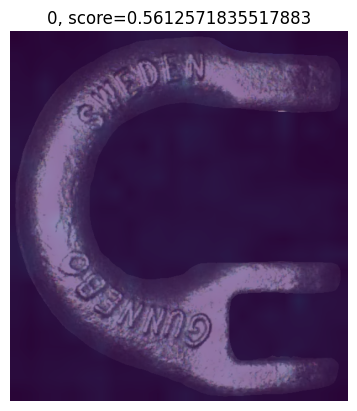

In [6]:
from src.repos.cs_flow.model import load_model
from src.repos.cs_flow.evaluate import compare_histogram, viz_roc, viz_map_array, evaluate

img_paths = test_set.paths if c.pre_extracted else [p for p, l in test_set.samples]
_, test_loader = make_dataloaders(train_set, test_set)
mod = load_model(c.modelname)
evaluate(mod, test_loader, score_export_dir, map_export_dir, img_paths, localize)